# Binary image classification tutorial
*Tutorial adapted from https://www.tensorflow.org/tutorials/keras/classification*

## Import packages

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


# Prepare the data
## Import the data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Plot the data

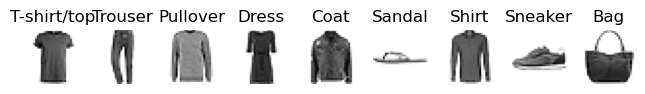

In [3]:
fig, axs = plt.subplots(1, 9)

for i in range(0,9):
    itemindex = np.where(train_labels == i)
    axs[i].imshow(train_images[itemindex[0][4],:,:],cmap='Greys')
    axs[i].set_axis_off()
    axs[i].set_title(class_names[i])

plt.tight_layout()
    
    
    


## Preprocess the data

In [4]:
train_images_preprocessed = np.empty_like(train_images)
test_images_preprocessed = np.empty_like(test_images)

for i in range(0,train_images.shape[0]):
    train_images_preprocessed[i,] = StandardScaler().fit_transform(train_images[i,])

for i in range(0,test_images.shape[0]):
    test_images_preprocessed[i,] = StandardScaler().fit_transform(test_images[i,])


# Train the models

## ANN model

In [5]:
model_ann = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

print(model_ann.summary())

model_ann.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model_ann.fit(train_images_preprocessed, train_labels, epochs=10)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.0336 - accuracy: 0.6848
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7100 - accuracy: 0.7663
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6035 - accuracy: 0.7963
Epo

## CNN model

In [6]:
trainX = train_images_preprocessed.reshape((train_images_preprocessed.shape[0], 28, 28, 1))
testX = test_images_preprocessed.reshape((test_images_preprocessed.shape[0], 28, 28, 1))

model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

print(model_cnn.summary())

model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model_cnn.fit(trainX, train_labels, epochs=10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               540900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

# Evaluate model

In [7]:
predictions_cnn = model_cnn.predict(testX)
predicted_class_labels_cnn = np.argmax(predictions_cnn, axis=1)

predictions_ann = model_ann.predict(test_images_preprocessed)
predicted_class_labels_ann = np.argmax(predictions_ann, axis=1)

## Classification report ANN

In [8]:
print(classification_report(test_labels, predicted_class_labels_ann))


              precision    recall  f1-score   support

           0       0.67      0.78      0.72      1000
           1       0.96      0.93      0.95      1000
           2       0.77      0.65      0.70      1000
           3       0.83      0.80      0.81      1000
           4       0.66      0.77      0.71      1000
           5       0.94      0.88      0.90      1000
           6       0.56      0.47      0.51      1000
           7       0.92      0.87      0.89      1000
           8       0.88      0.90      0.89      1000
           9       0.83      0.96      0.89      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



## Classification report CNN

In [9]:
print(classification_report(test_labels, predicted_class_labels_cnn))


              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1000
           1       0.94      0.96      0.95      1000
           2       0.72      0.82      0.77      1000
           3       0.85      0.86      0.85      1000
           4       0.77      0.73      0.75      1000
           5       0.91      0.95      0.93      1000
           6       0.68      0.57      0.62      1000
           7       0.91      0.91      0.91      1000
           8       0.95      0.94      0.95      1000
           9       0.94      0.93      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



## Confusion matrices

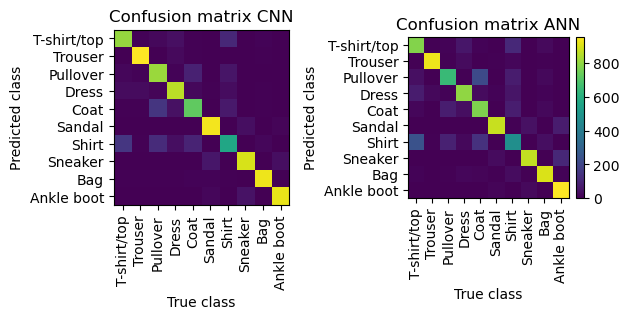

In [10]:


cm_cnn = confusion_matrix(test_labels, predicted_class_labels_cnn)

cm_ann = confusion_matrix(test_labels, predicted_class_labels_ann)

fig, (ax1,ax2) = plt.subplots(1,2)
img1 = ax1.imshow(cm_cnn)
ax1.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax1.set_xticklabels(class_names, rotation=90)
ax1.set_xlabel('True class')
ax1.set_yticks([0,1,2,3,4,5,6,7,8,9])
ax1.set_yticklabels(class_names)
ax1.set_ylabel('Predicted class')
ax1.set_title("Confusion matrix CNN")

img2 = ax2.imshow(cm_ann)
ax2.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax2.set_xticklabels(class_names, rotation=90)
ax2.set_xlabel('True class')
ax2.set_yticks([0,1,2,3,4,5,6,7,8,9])
ax2.set_yticklabels(class_names)
ax2.set_ylabel('Predicted class')
ax2.set_title("Confusion matrix ANN")
fig.colorbar(img2,ax=ax2,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()





## Visualize misclassified examples

True label:Pullover
Predicted label:Shirt


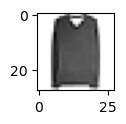

In [18]:
errors_cnn = np.where(predicted_class_labels_cnn != test_labels)
sample_to_show = errors_cnn[0][51]
print("True label:" + class_names[test_labels[sample_to_show]])
print("Predicted label:" + class_names[predicted_class_labels_cnn[sample_to_show]])
plt.figure(figsize=(1,1))
plt.imshow(test_images[sample_to_show], cmap='Greys')
